In [41]:
import pandas as pd
import plotly as py
import numpy as np
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

In [42]:
def generateDiscreteColourScale(colour_set):
    #colour set is a list of lists
    colour_output = []
    num_colours = len(colour_set)
    divisions = 1./num_colours
    c_index = 0.
    # Loop over the colour set
    for cset in colour_set:
        num_subs = len(cset)
        sub_divisions = divisions/num_subs
        # Loop over the sub colours in this set
        for subcset in cset:
            colour_output.append((c_index,subcset))
            colour_output.append((c_index + sub_divisions-
                .001,subcset))
            c_index = c_index + sub_divisions
    colour_output[-1]=(1,colour_output[-1][1])
    return colour_output

In [43]:
savedir = '/glade/campaign/univ/urtg0006/Brendan/GGCMI_model_comp_figs/protein'

In [44]:
maize = pd.read_excel(savedir + '/maize_clm_pchange_filter.xlsx', usecols="A,B")
maize_top = pd.read_excel(savedir + '/maize_clm_pchange_filter.xlsx', usecols="E,F")
rice = pd.read_excel(savedir + '/rice_clm_pchange_filter.xlsx', usecols="A,B")
rice_top = pd.read_excel(savedir + '/rice_clm_pchange_filter.xlsx', usecols="E,F")
soy = pd.read_excel(savedir + '/soy_clm_pchange_filter.xlsx', usecols="A,B")
soy_top = pd.read_excel(savedir + '/soy_clm_pchange_filter.xlsx', usecols="E,F")
wheat = pd.read_excel(savedir + '/wheat_clm_pchange_filter.xlsx', usecols="A,B")
wheat_top = pd.read_excel(savedir + '/wheat_clm_pchange_filter.xlsx', usecols="E,F")

In [45]:
color_schemes = [
    ['#a50026','#d73027','#f46d43','#fdae61','#fee08b','#ffffbf','#ffffbf','#d9ef8b','#a6d96a','#66bd63','#1a9850','#006837']]
cscale = generateDiscreteColourScale(color_schemes)

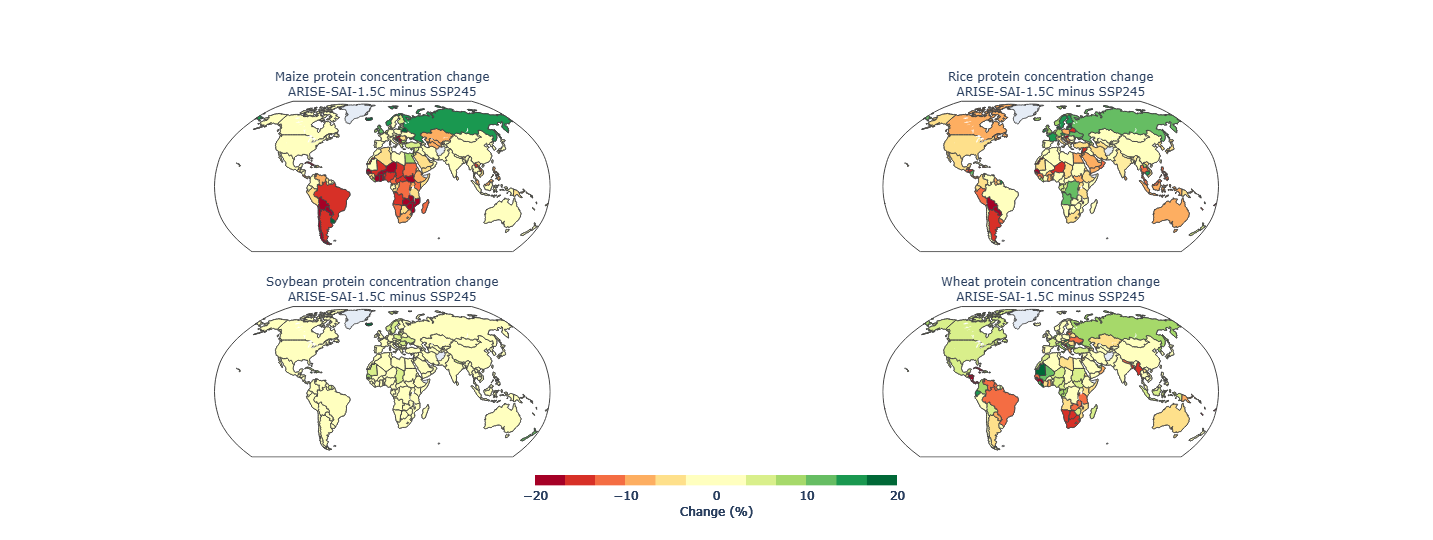

In [46]:
# Define subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Maize protein concentration change<br>ARISE-SAI-1.5C minus SSP245","Rice protein concentration change<br>ARISE-SAI-1.5C minus SSP245",
                    "Soybean protein concentration change<br>ARISE-SAI-1.5C minus SSP245", "Wheat protein concentration change<br>ARISE-SAI-1.5C minus SSP245"),
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}],
           [{"type": "choropleth"}, {"type": "choropleth"}]],
    row_heights=[0.3, 0.3],
    column_widths=[0.3, 0.3],
    vertical_spacing=0.15,
    horizontal_spacing=0.05
)

# Add Choropleths
fig.add_trace(go.Choropleth(locations=maize['nation-name'], colorscale=cscale, z=maize["pchange"],
                            locationmode="country names", zmin=-20, zmax=20,
                            colorbar={'title': {'text': 'Change (%)', 'font': {'size': 12}}}), row=1, col=1)
fig.add_trace(go.Choropleth(locations=rice['nation-name'], colorscale=cscale, z=rice["pchange"],
                            locationmode="country names", zmin=-20, zmax=20,
                            colorbar={'title': {'text': 'Change (%)', 'font': {'size': 12}}}), row=1, col=2)
fig.add_trace(go.Choropleth(locations=soy['nation-name'], colorscale=cscale, z=soy["pchange"],
                            locationmode="country names", zmin=-20, zmax=20,
                            colorbar={'title': {'text': 'Change (%)', 'font': {'size': 12}}}), row=2, col=1)
fig.add_trace(go.Choropleth(locations=wheat['nation-name'], colorscale=cscale, z=wheat["pchange"],
                            locationmode="country names", zmin=-20, zmax=20,
                            colorbar={'title': {'text': 'Change (%)', 'font': {'size': 12}}}), row=2, col=2)

# Update layout settings
fig.update_geos(projection_type="robinson", lataxis_range=[-60, 80])
fig.update_traces(colorbar_title_side='bottom', colorbar_orientation='h', colorbar_thickness=10,
                  colorbar_x=0.5, colorbar_y=-0.2, colorbar_len=0.3, row=1, col=1)
fig.update_traces(colorbar_title_side='bottom', colorbar_orientation='h', colorbar_thickness=10,
                  colorbar_x=0.5, colorbar_y=-0.2, colorbar_len=0.3, row=1, col=2)
fig.update_traces(colorbar_title_side='bottom', colorbar_orientation='h', colorbar_thickness=10,
                  colorbar_x=0.5, colorbar_y=-0.2, colorbar_len=0.3, row=2, col=1)
fig.update_traces(colorbar_title_side='bottom', colorbar_orientation='h', colorbar_thickness=10,
                  colorbar_x=0.5, colorbar_y=-0.2, colorbar_len=0.3, row=2, col=2)
fig.update_layout(width=850, height=540, annotations=[dict(font=dict(size=12))]  # Reduce subplot title font size
)



In [40]:
fig.write_image(savedir+"/Nature_Fig2_CLM.pdf",scale=1)